# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек


Выполнил студент гр. 9303 Дюков Владимир, вариант 4.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.


## Основные теоритические положения

### Бинарный метод

Бинарный метод - метод быстрого возведения в степень $n$ числа $x$.

Результат считается по следующим правилам:

Пусть текущий результат изначально равен $x$. Слева направо просматривается бинарная запись числа $n$ без первого бита. Если текущий бит записи равен $1$ - текущий результат возводится в квадрат и затем умножается на число $x$. Если текущий бит записи равен $0$ - текущий результат возводится в квадрат.


### Метод множителей
 
Метод множителей - метод быстрого возведения в степень $n$ числа $x$. Первоначально число $n$ раскладывается на произведение нескольких множителей: $a_i, i\in \{0, 1, ...\}$. Далее производится вычисления при помощи бинарного метода: $x^{a_0} = y, y^{a_1} = z, ... = x^n$.


### Аддитивная цепочка

Аддитивная цепочка — это последовательность натуральных чисел $\{a_i\}_{i=0}^m$, где $a_0 = 1$, $a_m = n$, а каждый из остальных элементов является суммой двух элементов, предшествующих ему. Эти два элемента могут быть равны. Например:

$a_0 = 1$

$\forall i > 0, a_i = a_j + a_k , j,k < i$

В аддитивной цепочке встречаются три типа шагов. Типы шагов:

- *Удвоение*. *i*-шаг при $j = k = i - 1$

- *Звездный*. *i*-шаг при $j = i - 1$, $k = \overline{0 .. (i-1)}$

- *Малый*. *i*-шаг при $\lambda(a_i) = \lambda(a_{i-1})$

**Звездная цепочка** - аддитивная цепочка, состоящая только из звездных шагов.

Пусть иммется звездная цепочка $ \{a_i\}_{i=1}^m $ . Тогда **вектор индексов** определяется, как  $\{r_i\}_{i=1}^{m-1}$ , где $r_i = \{x: 1 \leqslant x \leqslant i\}$ , а $a_i = a_{i-1} + a_{r_{i-1}}$ , $2 \leqslant i \leqslant m-1$ .


### Алгоритм Яо

Алгориитм Яо - алгоритм, занимаюшийся построением цепочки Яо для числа $n\in \mathbb{N}$.

Цепочка Яо - цепочка, состоящая из двух аддитивных цепочек. Первая цепочка равна $Y_k(n):1,2,4,\ ...\, 2^{\lambda (n)}$, вторая аддитивная цепочка составляется на основе первой.

$d(z)$ - сумма всех разрядов, цифра которых равняется z.

Представим число $n$ в виде: $n = \sum_{i = 0}^{j}a_j2^{ik}$, где $a_j \neq 0$, $k \geq 2$. В аддитивную цепочку последовательно добавляются следующие элементы:

1. $Y_k(n)$, т.е. элементы $\{1,2,4,8,..., 2^{\lambda(n)} \}$.

2. Значения функции $d(z)$, $z \in \{1, 2, 3, ..., 2^k-1\}$.

3. Значения $zd(z)$, $\forall z$.

Таким образом, $n = \sum_{z = 1}^{2^k-1}zd(z)$. Все промежуточные значения записывются во вторую аддитивную цепочку цепочки Яо.


### Алгоритм дробления вектора индексов

Алгоритм дробления вектора индексов - алгоритм поиска минимальной аддитивной цепочки. 

1. Запускаем внешний цикл по длинам цепочек $\underline{l}(n) \leq m \leq \overline{l}(n)$. Где $\underline{l}(n) = \lambda (n)$, а $\overline{l}(n) = \lambda(n) + \nu(n) - 1$. Пусть  $q = m//2 - 1$.

2. Запускаем внутрненний цикл перебора всех $\{r_i\}_{i=1}^{q}$.
  
  На каждом шаге вычисляем $a_{min} = a_{q+1} + m - q $ и $ a_{max} = a_{q+1}2^{m-q}$
 
  1. Если последний элемент в цепочки равен числу $ n $, заканчиваем алгоритм.
 
  2. Если $n \in [a_{min}, a_{max}]$ , то тогда перебираем часть вектора индексов $\{r_j\}_{j=q+1}^m$
 
  3. Если $n \notin [a_{min}, a_{max}]$ , то тогда перебираем часть вектора индексов $\{r_i\}_{i=1}^q$


### Теорема Брауэра и ее следствия

При некотором $k < lb(lb(n))$ справедливо следующее неравенство $l(n) < (1 + k^{-1})\left \lceil lb(n) \right \rceil + 2^{k-1} - k + 2$.  

**Следствия из теоремы Брауэра:**

1. Если $k = \lambda(\lambda(n)) - 2\lambda(\lambda(\lambda(n)))$, то $\lim_{n \to \infty} \frac{l(n)}{\lambda(n)} = 1$

2. Наименьшая верхняя оценка: $\lambda(n)(1 + \frac{1}{\lambda(\lambda(n))} + \frac{\mathcal{O}(\lambda(\lambda(\lambda(n))))}{{\lambda(\lambda(n))}^2}$


### Гипотеза Шольца-Брауэра:

$l^*(2^n-1) \leq l^*(n)+n-1$


## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы

1. Применить бинарный метод и метод множителей для $ x^n $, где $ n⩾30 $, для 2-3 значений $ n $ (значения $ n $ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.

2. Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.

3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $ n>500 $. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.

4. Проверить теорему Брауэра для $ n=1..200 $ путём построения функции $ l(n) $ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.

5. Проверить гипотезу Шольца–Брауэра для $ 1⩽n⩽10 $ на алгоритме дробления вектора индексов. Сделать выводы.


## Выполнение работы

### Вычисление степеней бинарным методом и методом множителей.

**Применим бинарный метод и метод множителей для $x^{66}$, $x^{96}$, $x^{127}$.**

<u>Бинарный метод для $x^{66}$</u>:
 
Представим показатель степени в двоичном виде: $66_{10}$ = $1000010_2$. Отбрасываем первый бит, получаем $000010$. Заменяем: 0 - умножение текущего числа на самого себя, 1 - умножение текущего числа на себя и умножение его на исходное.

$$ x*x = x^{2} $$
$$ x^{2}*x^{2} = x^{4} $$
$$ x^{4}*x^{4} = x^{8} $$
$$ x^{8}*x^{8} = x^{16} $$
$$ x^{16}*x^{16} = x^{32} $$
$$ x^{32}*x = x^{33} $$
$$ x^{33}*x^{33} = x^{66} $$

<u>Метод множителей для $x^{66}$</u>:

Разбиваем показатель степени на простые множители: $x^{66} = ((x^2)^3)^{11}$. Далее применяем для каждого возведения бинарный метод.

$$ x*x = x^{2} = y $$
$$ y*y = y^{2} $$
$$ y^{2}*y = y^{3} = z $$
$$ z*z = z^{2} = y $$
$$ z^{2}*z^{2} = z^{4} $$
$$ z^{4}*z = z^{5} $$
$$ z^{5}*z^{5} = z^{10} $$
$$ z^{10}*z = z^{11} $$

Результат: $z^{11} = (y^{3})^{11} = ((x^{2})^{3})^{11} = x^{66}$.

Количество операций для бинарного метода - 7, метода множителей - 8.

---

<u>Бинарный метод для $x^{96}$</u>:

Двоичная цепочка для определения операции: $100000$.

$$ x*x = x^{2} $$
$$ x^{2}*x = x^{3} $$
$$ x^{3}*x^{3} = x^{6} $$
$$ x^{6}*x^{6} = x^{12} $$
$$ x^{12}*x^{12} = x^{24} $$
$$ x^{24}*x^{24} = x^{48} $$
$$ x^{48}*x^{48} = x^{96} $$

<u>Метод множителей для $x^{96}$</u>:

Разбиваем показатель степени на простые множители: $x^{96} = (((((x^2)^2)^2)^2)^2)^3$. Представим $((((x^2)^2)^2)^2)^2$, как $x^{32}$.

$$ x*x = x^{2} $$
$$ x^{2}*x^{2} = x^{4} $$
$$ x^{4}*x^{4} = x^{8} $$
$$ x^{8}*x^{8} = x^{16} $$
$$ x^{16}*x^{16} = x^{32} = y $$
$$ y*y = y^{2} $$
$$ y^{2}*y = y^{3} $$

Результат: $y^{3} = (x^{32})^{3} = x^{96}$.

Количество операций для бинарного метода - 7, метода множителей - 7.

---

<u>Бинарный метод для $x^{127}$</u>:

Двоичная цепочка для определения операции: $1111111$.

$$ x*x = x^{2} $$
$$ x^{2}*x = x^{3} $$
$$ x^{3}*x^{3} = x^{6} $$
$$ x^{6}*x = x^{7} $$
$$ x^{7}*x^{7} = x^{14} $$
$$ x^{14}*x = x^{15} $$
$$ x^{15}*x^{15} = x^{30} $$
$$ x^{30}*x = x^{31} $$
$$ x^{31}*x^{31} = x^{62} $$
$$ x^{62}*x = x^{63} $$
$$ x^{63}*x^{63} = x^{126} $$
$$ x^{126}*x = x^{127} $$

<u>Метод множителей для $x^{127}$</u>:

Разбиваем показатель степени на простые множители: $x^{127} = x*x^{126} = x*(((x^2)^3)^3)^7$.

$$ x*x = x^{2} = y $$
$$ y*y = y^{2} $$
$$ y^{2}*y = y^{3} = z $$
$$ z*z = z^{2} $$
$$ z^{2}*z = z^{3} = t $$
$$ t*t = t^{2} $$
$$ t^{2}*t = t^{3} $$
$$ t^{3}*t^{3} = t^{6} $$
$$ t^{6}*t = t^{7} $$
$$ x*(t^{7}) = x*((((x^{2})^{3})^{3})^{7}) = x*x^{126} = x^{127} $$

Количество операций для бинарного метода - 12, метода множителей - 10.

**Вывод:**

*При степенях $n = 2^k-1, k \in N$ метод множителей оказывается эффеткивнее бинарного метода. При степенях $n = 2^k+1, k = 5,6,...$ бинарный метод оказывается эффективнее. В остальных случаях оба метода выполняются за одно и то же число операций или метод множителей выполняется быстрее, но не значительно.*


### Реализация алгоритма Яо.


In [27]:
from math import floor
from math import log


def _lambda(n):
    return floor(log(n, 2))


def _nu(n):
    return bin(n).count("1")


def base_decomposition(decimal_number, base):
    remainder_stack = []

    while decimal_number > 0:
        remainder = decimal_number % base
        remainder_stack.append(remainder)
        decimal_number = decimal_number // base

    new_digits = []
    while remainder_stack:
        new_digits.append(remainder_stack.pop())
    new_digits.reverse()
    return new_digits


def dz(yao_chain, coeffs, z, k):
    _dz = 0
    for i in range(len(coeffs)):
        if coeffs[i] == z:
            _dz += 2 ** (i * k)
            if _dz not in yao_chain:
                yao_chain.append(_dz)
    return _dz


def binary_expand(dz, z):
    bin_pow = bin(z)[3:]
    add_chain = [dz]
    cur_pow = dz
    for bit in bin_pow:
        cur_pow *= 2
        add_chain.append(cur_pow)
        if bit == '1':
            cur_pow += dz
            add_chain.append(cur_pow)
    return add_chain


def yao(n, k):
    yao_chain = [2 ** i for i in range(_lambda(n) + 1)]
    coeffs = base_decomposition(n, 2 ** k)
    sum_zdz = 0
    for z in range(1, 2 ** k):
        _dz = dz(yao_chain, coeffs, z, k)
        if _dz != 0:
            to_add = binary_expand(_dz, z)
            for i in range(len(to_add)):
                if to_add[i] not in yao_chain:
                    yao_chain.append(to_add[i])
            sum_zdz += to_add[-1]
            if sum_zdz not in yao_chain:
                yao_chain.append(sum_zdz)
    yao_chain.sort()
    return yao_chain


if __name__ == "__main__":
    N = int(input("Введите N: "))
    K = int(input("Введите K: "))
    V = yao(N, K)
    print(V)
    print("Длина цепочки: ", len(V))

Введите N: 999
Введите K: 4
[1, 2, 3, 4, 6, 7, 8, 16, 32, 48, 64, 96, 112, 128, 224, 256, 512, 768, 775, 999]
Длина цепочки:  20


Проведём несколько тестов и сопоставим длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа.

N      |K      |Цепочка Яо                                                  |Длина цепочки|Минимальная АЦ|
:-----:|:-----:|:----------------------------------------------------------:|:-----------:|:------------:|
56     |2      |1, 2, 4, 8, 16, 32, 48, 56                                  |8            |7             |
56     |3      |1, 2, 4, 8, 16, 24, 32, 48, 56                              |9            |7             |
56     |4      |1, 2, 4, 8, 16, 32, 48, 56                                  |8            |7             |
131    |2      |1, 2, 3, 4, 8, 16, 32, 64, 128, 131                         |10           |9             |
131    |3      |1, 2, 3, 4, 8, 16, 32, 64, 128, 131                         |10           |9             |
131    |4      |1, 2, 3, 4, 8, 16, 32, 64, 128, 131                         |10           |9             |
236    |2      |1, 2, 4, 8, 16, 32, 64, 68, 128, 136, 204, 236              |12           |10            |
236    |3      |1, 2, 4, 8, 16, 32, 40, 64, 128, 192, 196, 236              |12           |10            |
236    |4      |1, 2, 3, 4, 6, 8, 12, 16, 32, 48, 64, 96, 112, 128, 224, 236|16           |10            |

**Вывод:**

Алгоритм Яо действительно строит аддитивные цепочки для заданных n и k, однако, полученные цепочки не обязательно минимальны - только при маленьких значениях n алгоритм способен выдавать цепочки, близкие к оптимальным.


### Реализация алгоритма дробления вектора индексов для нахождения минимальной звёздной цепочки.

Данный алгоритм является точным алгоритмом и находит минимальную звёздную цепочку для числа $n$. Ниже представлена реализация алгоритма дробления вектора индексов.

In [16]:
import time

def splitting(n):
    for m in range(int(n).bit_length(), int(n).bit_length()+bin(int(n)).count('1')):
        vector = [i for i in range(1, m)]
        q = m // 2 - 1

        while True:
            chain = [1]
            for i in vector:
                chain.append(chain[-1] + chain[i-1]) 
            if chain[m-1] == n: 
                return chain

            if n < (chain[q]+m-q) or chain[q]*2**(m-q) < n:
                for i in range(0, q, -1):        
                    if vector[i-1] > 1:
                        vector[i-1] -= 1
                        break
                    else: 
                        vector[i-1] = i
                if sum(vector[:q]) == abs(q):
                    break 
            
            else:
                for i in range(m-1, q, -1):        
                    if vector[i-1] > 1:
                        vector[i-1] -= 1
                        break
                    else: 
                        vector[i-1] = i
                if sum(vector[q:]) == abs(m-q-1):
                    break  
                        
    return chain


if __name__ == "__main__":
    N = int(input("Введите N: "))
    start_time = time.time()
    V = splitting(N)
    print(V)
    print("Врема работы: ", time.time() - start_time)
    print("Длина цепочки: ", len(V))

Алгоритм дробления вектора индексов
Введите N: 999
[1, 2, 4, 8, 16, 32, 64, 128, 129, 258, 290, 580, 870, 999]
Врема работы:  73.8963692188263
Длина звёздной цепочки:  14


*Результаты работы алгоритма дробления ветктора индексов для $n = 501, 511, 999$:*

|n    |Длина цепочки|Цепочка                                                  |Время поиска, c|
|:---:|:-----------:|:-------------------------------------------------------:|:-------------:|
|501  |13           |1, 2, 4, 8, 16, 32, 64, 96, 100, 200, 400, 500, 501      |7.80           |
|511  |13           |1, 2, 4, 8, 16, 32, 64, 72, 73, 146, 292, 438, 511       |10.41          |
|999  |14           |1, 2, 4, 8, 16, 32, 64, 128, 129, 258, 290, 580, 870, 999|73.89          |

 *Сравнение длин цепочек, полученных различными методами и алгоритмами:*

|n    |Бинарный метод|Алгоритм Яо|Алгоритм ДВИ|
|:---:|:------------:|:---------:|:----------:|
|501  |15            |15         |13          |
|511  |17            |15         |13          |
|999  |17            |16         |14          |


**Вывод:**

*На основе первой таблицы можно сделать вывод, что алгоритм дробления вектора индексов даёт аддитивную цепочку минимальной длины, но при этом вычисления занимают много времени. При сравнении длин цепочек можно сделать вывод, что из предыдущих алгоритмов ближе к точному результату бинарный метод.*


### Проверка следствия теоремы Брауэра.


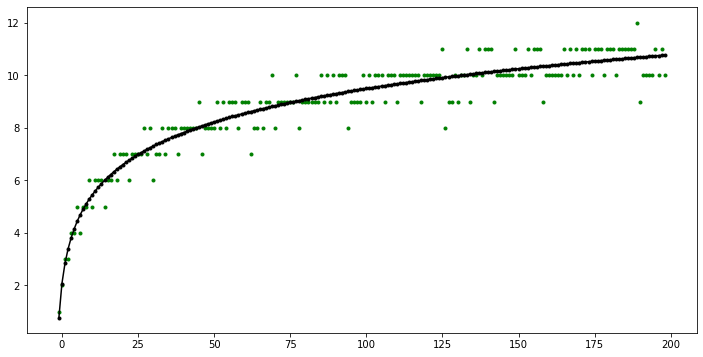

In [35]:
import pylab
from math import e, log

x = [(i - 1) for i in range(0, 200)]
length = [len(splitting(i)) for i in range(1, 201)]
logx = [log(i, e) for i in range(1, 201)]
logx2 = [log(i, e)**2 for i in range(1, 201)]
power = [length[i-1] * logx[i-1] for i in range(1, 201)]

b = (201*sum(power) - sum(length)*sum(logx)) / (201*sum(logx2) - sum(logx)*sum(logx))
a = (sum(length) - b * sum(logx))/(200)

y = [(a + b*logx[i]) for i in range(0, 200)]

pylab.figure(figsize=(12, 6))
pylab.plot(x, y, color='black', marker = '.')
pylab.scatter(x, length, color='green', marker = '.')
pylab.show()

**Вывод:**

*На основе графика можно сделать вывод, что функция $l(n),\, n=1..200$ аппроксимируется логарифмической кривой. Это подтверждает следствие 1 теоремы Брауэра: $\lim\limits_{x\to\infty} \cfrac{l(n)}{\lambda(n)} = 1$, то есть $l(n)$ и $\lambda(n)$ эквивалентны на бесконечности. С увеличением $n$ длина минимальной аддитивной цепочки $l(n)$ будет увеличиваться как логарифмическая функция.*


### Проверка гипотезы Шольца–Брауэра.

| N              |  Длина ЗЦ   
| :-------------: | :------------:                        
| 2               | 1                                 
| 3               | 2                               
| 5               | 3      
| 31              | 7   
| 7               | 4           
| 127             | 10            
| 10              | 4           
| 1023            | 13          


Например при $ n = 5 $:

   $ l(2^5-1) = l(5) + 5 - 1 $
   
   $ l(31) = 3 + 5 - 1 $
   
   $ 7 = 7 $
   
Следовательно, гипотеза для $ n \leqslant 10 $ доказана.


## Вывод

Реализованы точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек. Были реализованы такие алгоритмы, как бинарный метод, метод множителей, алгоритм Яо, алгоритм дробления вектора индексов. Для каждого алгоритма были проведены тесты. Были проверены следствие теоремы Брауэра и гипотеза Шольца–Брауэра. 